In [2]:
import dotenv

dotenv.load_dotenv()
import os
import pandas as pd

pd.set_option('display.max_rows', 6)

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

## Test the API stock price history

In [1]:
import refinitiv.data as rd
# /Users/darien/Configs/refinitiv-data.config.json
rd.open_session(config_name='/Users/darien/Configs/refinitiv-data.config.json').open()

start="2021-01-01"
end="2023-12-31"
ticker = "AAPL"

### Pull Rifinitiv data

In [10]:
rd.close_session()

In [5]:
import refinitiv.data as rd


start="2021-01-01"
end="2023-12-31"
ticker = "AAPL"

try:
    rd.open_session(config_name='./refinitiv-data.config.json').open()
except:
    rd.open_session(config_name='/Users/darien/Configs/refinitiv-data.config.json').open()


s1_rd_raw = rd.content.historical_pricing.summaries.Definition(ticker+'.O', start=start, end=end).get_data()
s1_rd = s1_rd_raw.data.df

s1_rd



AAPL.O      TRDPRC_1    HIGH_1    LOW_1  ACVOL_UNS  OPEN_PRC     BID     ASK  \
Date                                                                           
2021-01-04    129.41  133.6116   126.76  143301887    133.52   129.4  129.41   
2021-01-05    131.01    131.74   128.43   97664898    128.89  130.95  130.96   
2021-01-06     126.6  131.0499  126.382  155087970    127.72  126.58  126.68   
...              ...       ...      ...        ...       ...     ...     ...   
2023-12-27    193.15     193.5   191.09   48087681    192.49  193.18   193.2   
2023-12-28    193.58    194.66   193.17   34049898    194.14  193.57  193.58   
2023-12-29    192.53     194.4  191.725   42672148     193.9  192.49  192.54   

AAPL.O              TRNOVR_UNS      VWAP  BLKCOUNT  BLKVOLUM  NUM_MOVES  \
Date                                                                      
2021-01-04  18590920609.960945  129.6944       175  25021731    1310221   
2021-01-05   12766554556.37639  130.7353       120  16268457     707577   
2021-01-06   19905574086.05994  128.3811       189  17765110    1202574   
...                        ...       ...       ...       ...        ...   
2023-12-27        9260141930.0  192.5342        95  12817004     548076   
2023-12-28        6603031144.0  193.9365        56   6555763     472404   
2023-12-29        8217635465.0   192.572        67  11879095     509123   

AAPL.O      TRD_STATUS  SALTIM  NAVALUE  
Date                                     
2021-01-04           1   75600     <NA>  
2021-01-05           1   75600     <NA>  
2021-01-06           1   76500     <NA>  
...                ...     ...      ...  
2023-12-27           1   76500     <NA>  
2023-12-28           1   75600     <NA>  
2023-12-29           1   75600     <NA>  

[753 rows x 15 columns]

### Rename columns to OHLC standard

In [6]:
s1_rd = s1_rd.rename(columns={
    'TRDPRC_1': 'Close',
    'HIGH_1': 'High',
    'LOW_1': 'Low',
    'ACVOL_UNS': 'Volume',
    'OPEN_PRC': 'Open'
})

s1_rd = s1_rd.astype(float)

s1_rd

AAPL.O       Close      High      Low       Volume    Open     BID     ASK  \
Date                                                                         
2021-01-04  129.41  133.6116  126.760  143301887.0  133.52  129.40  129.41   
2021-01-05  131.01  131.7400  128.430   97664898.0  128.89  130.95  130.96   
2021-01-06  126.60  131.0499  126.382  155087970.0  127.72  126.58  126.68   
...            ...       ...      ...          ...     ...     ...     ...   
2023-12-27  193.15  193.5000  191.090   48087681.0  192.49  193.18  193.20   
2023-12-28  193.58  194.6600  193.170   34049898.0  194.14  193.57  193.58   
2023-12-29  192.53  194.4000  191.725   42672148.0  193.90  192.49  192.54   

AAPL.O        TRNOVR_UNS      VWAP  BLKCOUNT    BLKVOLUM  NUM_MOVES  \
Date                                                                  
2021-01-04  1.859092e+10  129.6944     175.0  25021731.0  1310221.0   
2021-01-05  1.276655e+10  130.7353     120.0  16268457.0   707577.0   
2021-01-06  1.990557e+10  128.3811     189.0  17765110.0  1202574.0   
...                  ...       ...       ...         ...        ...   
2023-12-27  9.260142e+09  192.5342      95.0  12817004.0   548076.0   
2023-12-28  6.603031e+09  193.9365      56.0   6555763.0   472404.0   
2023-12-29  8.217635e+09  192.5720      67.0  11879095.0   509123.0   

AAPL.O      TRD_STATUS   SALTIM  NAVALUE  
Date                                      
2021-01-04         1.0  75600.0      NaN  
2021-01-05         1.0  75600.0      NaN  
2021-01-06         1.0  76500.0      NaN  
...                ...      ...      ...  
2023-12-27         1.0  76500.0      NaN  
2023-12-28         1.0  75600.0      NaN  
2023-12-29         1.0  75600.0      NaN  

[753 rows x 15 columns]

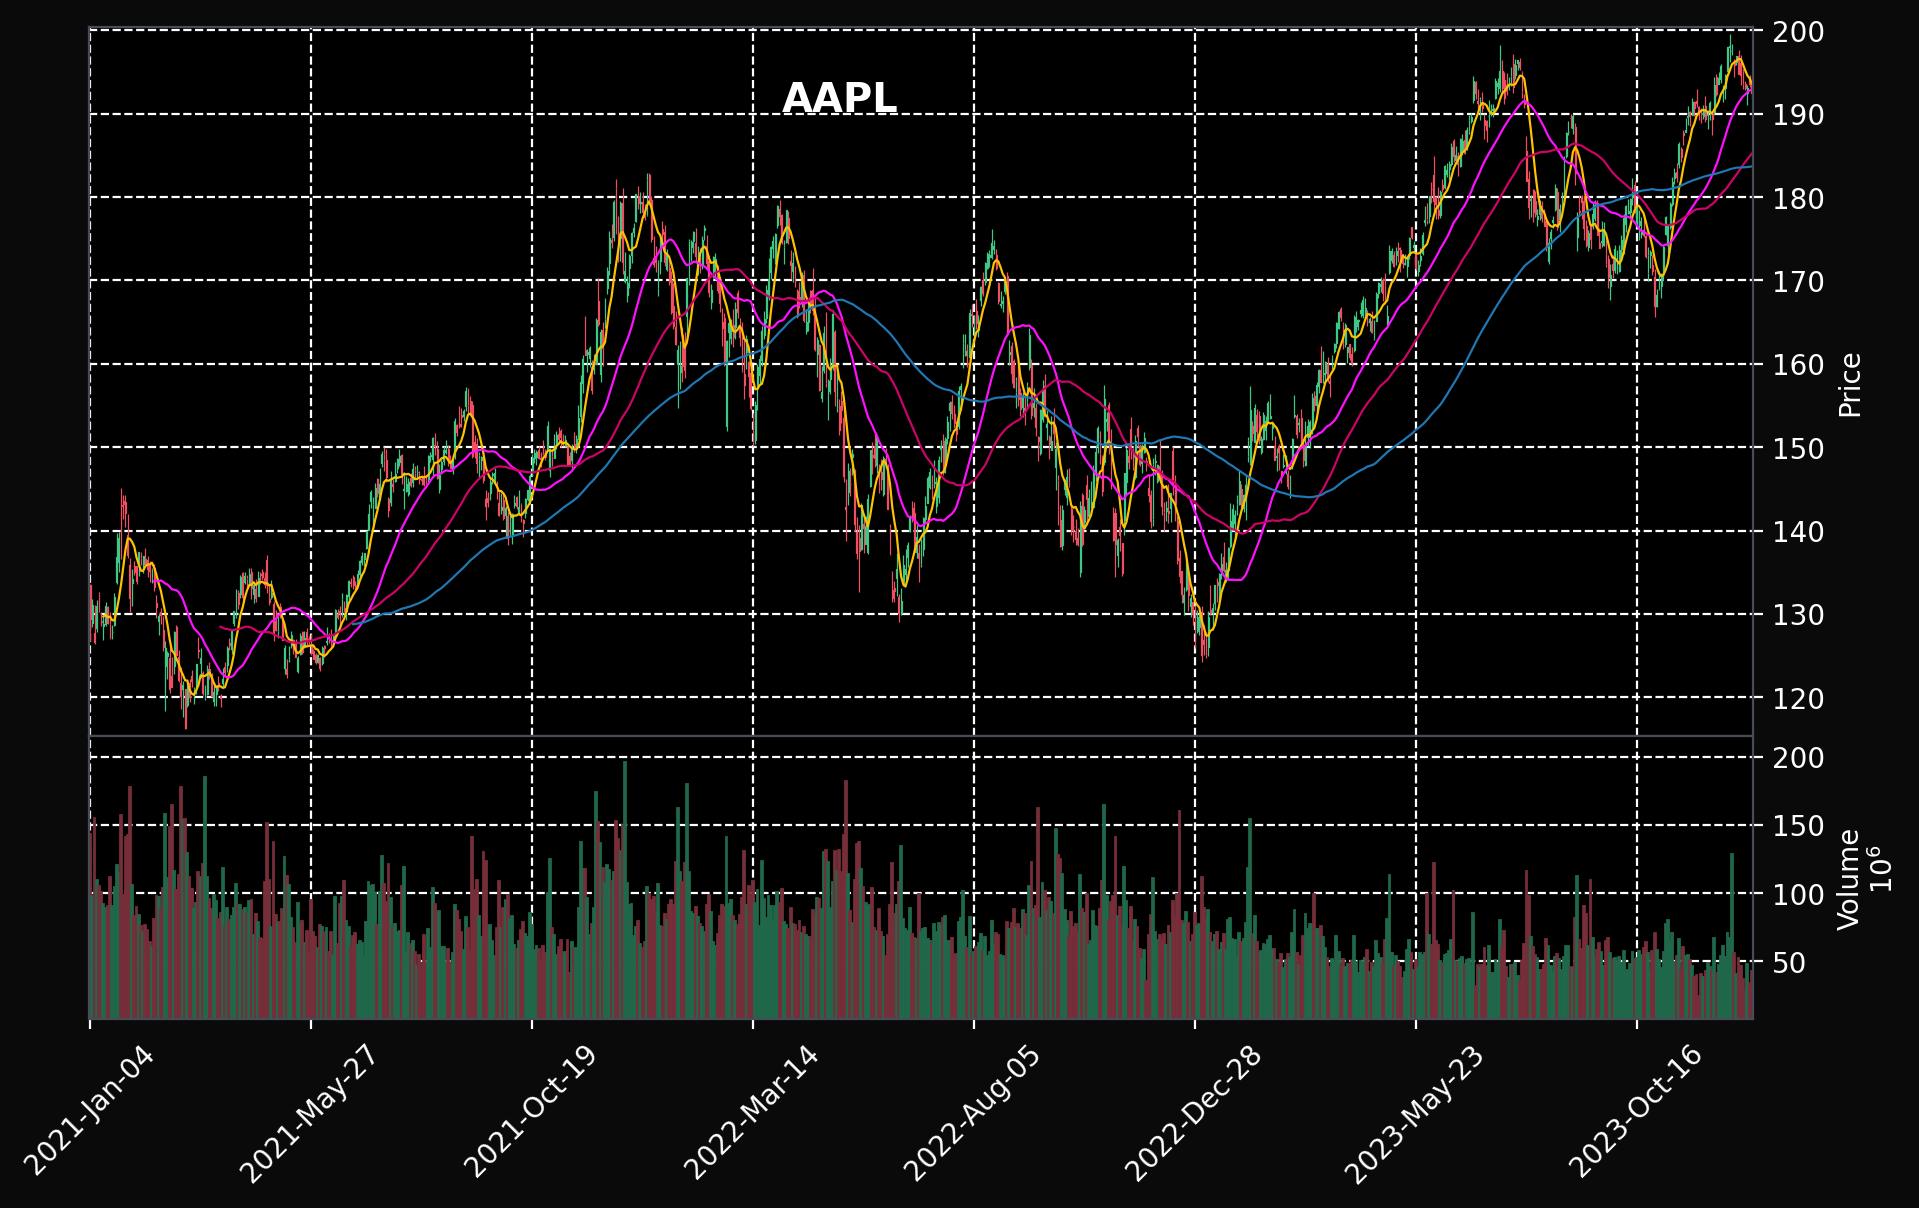

In [7]:
import mplfinance as mpf
mpf

mpf.plot(s1_rd, 
         style='binancedark', 
         type='candle',
         mav=(7, 30, 60, 120),
            volume=True,
            ylabel='Price',
            ylabel_lower='Volume',
            figratio=(10,6),
            title=ticker,
            tight_layout=True,
)

In [28]:
import json
import requests
import datetime as dt
import pandas as pd

def update_market_data():
    try:
        url = 'https://api.binance.com/api/v3/exchangeInfo'
        data = requests.get(url).json()
        df_binance = pd.DataFrame(data['symbols'])[pd.DataFrame(data['symbols'])['status'] == 'TRADING'][['symbol', 'baseAsset', 'quoteAsset']]
        df_binance = df_binance[(df_binance['quoteAsset'].isin(['BNB', 'BTC', 'BUSD', 'ETH', 'USDT']))]
        df_binance.columns = ['Binance Pair', 'Currency', 'Market']
        df_binance = df_binance.reset_index(drop = True)
        df_binance.loc[0, 'Last Update'] = dt.date.today()

        df_binance.to_csv('market_data/binance.txt', index = False)
    except:
        pass

    try:
        url = 'https://api.binance.us/api/v3/exchangeInfo'
        data = requests.get(url).json()
        df_binance_us = pd.DataFrame(data['symbols'])[pd.DataFrame(data['symbols'])['status'] == 'TRADING'][['symbol', 'baseAsset', 'quoteAsset']]
        df_binance_us = df_binance_us[(df_binance_us['quoteAsset'].isin(['BTC', 'BUSD', 'ETH', 'USD', 'USDT']))]
        df_binance_us.columns = ['Binance Pair', 'Currency', 'Market']
        df_binance_us = df_binance_us.reset_index(drop = True)
        df_binance_us.loc[0, 'Last Update'] = dt.date.today()

        df_binance_us.to_csv('market_data/binance_us.txt', index = False)
    except:
        pass

    try:
        df_dow = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
        df_dow['Currency'] = 'USD'
        df_dow = df_dow[['Symbol', 'Company']]
        df_dow.columns = ['Ticker', 'Company']
        df_dow['Index Fund'] = 'US Dow Jones'
        df_dow['Currency'] = 'USD'
        df_dow['Currency_Name'] = 'US Dollar'
    except:
        df_dow = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_nasdaq = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]
        df_nasdaq = df_nasdaq[['Ticker', 'Company']]
        df_nasdaq.columns = ['Ticker', 'Company']
        df_nasdaq['Index Fund'] = 'US NASDAQ 100'
        df_nasdaq['Currency'] = 'USD'
        df_nasdaq['Currency_Name'] = 'US Dollar'
    except:
        df_nasdaq = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_russell = pd.read_html('https://en.wikipedia.org/wiki/Russell_1000_Index')[2]
        df_russell = df_russell[['Ticker', 'Company']]
        df_russell['Index Fund'] = 'US Russell 1000'
        df_russell['Currency'] = 'USD'
        df_russell['Currency_Name'] = 'US Dollar'
    except:
        df_russell = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_snp = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
        df_snp = df_snp[['Symbol', 'Security']]
        df_snp.columns = ['Ticker', 'Company']
        df_snp['Index Fund'] = 'US S&P 500'
        df_snp['Currency'] = 'USD'
        df_snp['Currency_Name'] = 'US Dollar'
    except:
        df_snp = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_sse = pd.read_html('https://en.wikipedia.org/wiki/SSE_50_Index')[1]
        df_sse = df_sse[['Ticker symbol', 'Name']]
        df_sse.columns = ['Ticker', 'Company']
        df_sse['Ticker'] = df_sse['Ticker'].apply(lambda x: x.split(' ')[1] + '.SS')
        df_sse['Index Fund'] = 'Chinese SSE 50'
        df_sse['Currency'] = 'CNY'
        df_sse['Currency_Name'] = 'Chinese Yuan'
    except:
        df_sse = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_csi = pd.read_html('https://en.wikipedia.org/wiki/CSI_300_Index')[3]
        df_csi.loc[df_csi['Stock exchange'] == 'Shanghai', 'Ticker'] =  df_csi['Index'].astype('str') + '.SS'
        df_csi.loc[df_csi['Stock exchange'] == 'Shenzhen', 'Ticker'] =  df_csi['Index'].astype('str') + '.SZ'
        tickers = []
        zeros = ['0']
        for ticker in df_csi['Ticker'].values:
            if len(ticker) < 9:
                sum_zeros = zeros * (9 - len(ticker))
                ticker = ''.join(sum_zeros) + ticker
            tickers.append(ticker)
        df_csi['Ticker'] = tickers
        df_csi = df_csi[['Ticker', 'Company']]
        df_csi['Index Fund'] = 'Chinese CSI 300'
        df_csi['Currency'] = 'CNY'
        df_csi['Currency_Name'] = 'Chinese Yuan'
    except:
        df_csi = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_ftse = pd.read_html('https://en.wikipedia.org/wiki/FTSE_100_Index')[4]
        df_ftse = df_ftse[['Ticker', 'Company']]
        df_ftse['Ticker'] = df_ftse['Ticker'].apply(lambda x: x + '.L')
        df_ftse['Index Fund'] = 'British FTSE 100'
        df_ftse['Currency'] = 'GBP'
        df_ftse['Currency_Name'] = 'British Pound'
    except:
        df_ftse = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_dax = pd.read_html('https://en.wikipedia.org/wiki/DAX')[4]
        df_dax = df_dax[['Ticker', 'Company']]
        df_dax.columns = ['Ticker', 'Company']
        df_dax['Index Fund'] = 'German DAX'
        df_dax['Currency'] = 'EUR'
        df_dax['Currency_Name'] = 'Euro'
    except:
        df_dax = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_cac = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
        df_cac = df_cac[['Ticker', 'Company']]
        df_cac.columns = ['Ticker', 'Company']
        df_cac['Index Fund'] = 'French CAC 40'
        df_cac['Currency'] = 'EUR'
        df_cac['Currency_Name'] = 'Euro'
    except:
        df_cac = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_bse_sensex = pd.read_html('https://en.wikipedia.org/wiki/BSE_SENSEX')[1]
        df_bse_sensex = df_bse_sensex[['Symbol', 'Companies']]
        df_bse_sensex.columns = ['Ticker', 'Company']
        df_bse_sensex['Index Fund'] = 'Indian S&P BSE SENSEX'
        df_bse_sensex['Currency'] = 'INR'
        df_bse_sensex['Currency_Name'] = 'Indian Rupee'
    except:
        df_bse_sensex = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_nifty = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2]
        df_nifty = df_nifty[['Symbol', 'Company Name']]
        df_nifty.columns = ['Ticker', 'Company']
        df_nifty['Ticker'] = df_nifty['Ticker'].apply(lambda x: x + '.NS')
        df_nifty['Index Fund'] = 'Indian Nifty 50'
        df_nifty['Currency'] = 'INR'
        df_nifty['Currency_Name'] = 'Indian Rupee'
    except:
        df_nifty = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])
    try:
        df_asx = pd.read_html('https://en.wikipedia.org/wiki/S%26P/ASX_200')[1]
        df_asx = df_asx[['Code', 'Company']]
        df_asx.columns = ['Ticker', 'Company']
        df_asx['Ticker'] = df_asx['Ticker'].apply(lambda x: x + '.AX')
        df_asx['Index Fund'] = 'Australian S&P ASX 200'
        df_asx['Currency'] = 'AUD'
        df_asx['Currency_Name'] = 'Australian Dollar'
    except:
        df_asx = pd.DataFrame(columns = ['Ticker', 'Company', 'Index Fund', 'Currency', 'Currency_Name'])

    df_stocks = pd.concat([df_snp, df_nasdaq, df_dow, df_russell, df_sse, df_csi, df_ftse, df_dax, df_cac, df_bse_sensex, df_nifty, df_asx], ignore_index = True)
    df_stocks.loc[0, 'Last Update'] = dt.date.today()
    df_stocks.to_csv('market_data/stocks.txt', index = False)

    try:
        df_forex = pd.read_html('https://finance.yahoo.com/currencies')[0]
        df_forex = df_forex[['Symbol', 'Name']].iloc[:-1]
        df_forex.columns = ['Ticker', 'Currencies']
        df_forex['Currency'] = df_forex['Currencies'].astype('str').apply(lambda x: x.split('/')[0])
        df_forex['Market'] = df_forex['Currencies'].astype('str').apply(lambda x: x.split('/')[1])
        df_forex['Currencies'] = df_forex['Currencies'].apply(lambda x: x.replace('/', ' to '))
        df_forex.loc[0, 'Last Update'] = dt.date.today()
        df_forex.to_csv('market_data/forex.txt', index = False)
    except:
        pass

    try:
        df_futures = pd.read_html('https://finance.yahoo.com/commodities')[0]
        df_futures = df_futures[['Symbol', 'Name']]
        df_futures.columns = ['Ticker', 'Futures']
        for futures_ in [['BTC=F', 'Bitcoin Futures'], ['ETH=F', 'Ether Futures'],  ['DX=F', 'US Dollar Index']]:
            df_futures.loc[len(df_futures)] = futures_
        df_futures = df_futures.drop_duplicates(subset = ['Ticker', 'Futures'], keep = False)
        df_futures.loc[0, 'Last Update'] = dt.date.today()
        df_futures.to_csv('market_data/futures.txt', index = False)
    except:
        pass

    try:
        df_indexes = pd.read_html('https://finance.yahoo.com/world-indices/')[0]
        df_indexes = df_indexes[['Symbol', 'Name']]
        df_indexes.columns = ['Ticker', 'Indexes']
        df_indexes.loc[0, 'Last Update'] = dt.date.today()
        df_indexes.to_csv('market_data/indexes.txt', index = False)
    except:
        pass
        

In [85]:

import json
import requests
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import gc



pd.set_option("display.precision", 8)

def data_update():
    df_crypto = pd.read_csv('market_data/binance_us.txt')
    df_stocks = pd.read_csv('market_data/stocks.txt')
    df_indexes = pd.read_csv('market_data/indexes.txt')
    df_futures = pd.read_csv('market_data/futures.txt')
    df_forex = pd.read_csv('market_data/forex.txt')

    day_limit = 15

    if (((dt.datetime.now() - pd.to_datetime(df_crypto['Last Update'][0])).days >= day_limit) or 
        ((dt.datetime.now() - pd.to_datetime(df_stocks['Last Update'][0])).days >= day_limit) or 
        ((dt.datetime.now() - pd.to_datetime(df_indexes['Last Update'][0])).days >= day_limit) or 
        ((dt.datetime.now() - pd.to_datetime(df_futures['Last Update'][0])).days >= day_limit) or 
        ((dt.datetime.now() - pd.to_datetime(df_forex['Last Update'][0])).days >= day_limit)):
        update_market_data()

    gc.collect()
        
def date_utc(date_):
    date_ = pd.to_datetime(date_, utc = True)
    date_ = date_.dt.tz_localize(None)
    return date_
        
class Data_Sourcing:
    def __init__(self):
    
        self.df_crypto = pd.read_csv('market_data/binance_us.txt')
        self.df_stocks = pd.read_csv('market_data/stocks.txt')
        self.df_indexes = pd.read_csv('market_data/indexes.txt')
        self.df_futures = pd.read_csv('market_data/futures.txt')
        self.df_forex = pd.read_csv('market_data/forex.txt')

    def exchange_data(self, exchange):
        self.exchange = exchange
        if self.exchange == 'Binance':
            self.markets = np.sort(self.df_crypto['Market'].unique())
        else: 
            self.stock_indexes = np.sort(self.df_stocks['Index Fund'].unique())
            self.indexes = np.sort(self.df_indexes['Indexes'].unique())
            self.futures = np.sort(self.df_futures['Futures'].unique())
            self.forex = np.sort(self.df_forex['Currencies'].unique())

    def market_data(self, market):
        self.market = market
        if self.exchange != 'Yahoo! Finance':
            self.assets = np.sort(self.df_crypto[(self.df_crypto['Market'] == self.market)]['Currency'].unique())
            self.currency = self.market
        else:
            self.stocks = np.sort(self.df_stocks[(self.df_stocks['Index Fund'] == self.market)]['Company'].unique())
            
    def intervals(self, selected_interval=None, start_date=None, end_date=None):
        self.start_date = start_date
        self.end_date = end_date
        self.selected_interval = selected_interval
        self.period = None
        try:
            exchange_interval = {'Yahoo! Finance': {'5 Minute':'5m', '15 Minute':'15m', '30 Minute':'30m', '1 Hour':'60m', 
                                                    '1 Day':'1d', '1 Week':'1wk', '1 Month':'1mo'}, 
                                'Binance': {'1 Minute':'1m', '3 Minute':'3m', '5 Minute':'5m', '15 Minute':'15m', '30 Minute':'30m', 
                                            '1 Hour':'1h', '6 Hour':'6h', '12 Hour':'12h', '1 Day':'1d', '1 Week':'1w', '1 Month':'1M'}}
            
            self.exchange_interval = exchange_interval[self.exchange][self.selected_interval]

            if self.exchange == 'Yahoo! Finance':
                if self.selected_interval == '1 Minute':
                    self.period = '7d'
                elif self.selected_interval == '5 Minute' or self.selected_interval == '15 Minute' or self.selected_interval == '30 Minute':
                    self.period = '1mo'
                elif self.selected_interval == '1 Hour':
                    self.period = '2y'
                else:
                    self.period = 'max'

        except:
            self.exchange_interval = self.selected_interval
            self.period = 'max'
            
    def apis(self, asset):
        self.asset = asset
        limit = 600
    
        if self.exchange == 'Refinitiv':
            self.ticker = self.asset
            try:
                rd.open_session(config_name='./refinitiv-data.config.json').open()
            except:
                rd.open_session(config_name='/Users/darien/Configs/refinitiv-data.config.json').open()
            if self.start_date and self.end_date:
                try:
                    self.selected_interval = f"P{self.selected_interval.upper()}"
                    rd_raw = rd.content.historical_pricing.summaries.Definition(self.ticker+'.O', start=self.start_date, end=self.end_date, interval=self.selected_interval).get_data()
                except:
                    self.selected_interval = f"PT{self.selected_interval.upper()}"
                    rd_raw = rd.content.historical_pricing.summaries.Definition(self.ticker, start=self.start_date, end=self.end_date, interval=self.selected_interval).get_data()
                else:
                    print("Incorrect Interval Selection")

                self.df = rd_raw.data.df.rename(columns={
                    'TRDPRC_1': 'Close',
                    'HIGH_1': 'High',
                    'LOW_1': 'Low',
                    'ACVOL_UNS': 'Volume',
                    'OPEN_PRC': 'Open'
                }).astype(float).reset_index()
                self.df['Adj Close'] = self.df['Close']

        elif self.exchange =='Yahoo! Finance':
            try:
                try:
                    self.ticker = self.df_stocks[((self.df_stocks['Company'] == self.asset) & (self.df_stocks['Index Fund'] == self.market))]['Ticker'].values[0]
                    self.market = self.df_stocks[((self.df_stocks['Company'] == self.asset) & 
                                            (self.df_stocks['Index Fund'] == self.market))]['Currency_Name'].unique()[0]
                except:
                    self.ticker = self.asset 
                    self.market = 'US Dollar'
            except:
                try:
                    self.ticker = self.df_indexes[(self.df_indexes['Indexes'] == self.asset)]['Ticker'].values[0]
                except:
                    try:
                        self.ticker = self.df_futures[(self.df_futures['Futures'] == self.asset)]['Ticker'].values[0]
                    except:
                        self.ticker = self.df_forex[(self.df_forex['Currencies'] == self.asset)]['Ticker'].values[0]
                    
            if self.start_date and self.end_date:
                self.df = yf.download(tickers = self.ticker, start = self.start_date, end = self.end_date, interval=self.selected_interval,
                                    auto_adjust = True, prepost = True, threads = True, proxy = None).reset_index()
            elif self.period:
                self.df = yf.download(tickers = self.ticker, period = self.period, interval = self.selected_interval, 
                                    auto_adjust = True, prepost = True, threads = True, proxy = None).reset_index()
        
            self.df = self.df.rename(columns = {'Datetime':'Date', 'Close': 'Adj Close'})
            
        elif self.exchange != 'Yahoo! Finance':

            self.ticker_market = self.df_crypto[((self.df_crypto['Currency'] == self.asset) & 
                 (self.df_crypto['Market'] == self.market))][f'{self.exchange} Pair'].values[0]
            self.currency = self.markets
            if self.exchange == 'Binance':
                try:
                    url = f"https://api.binance.com/api/v3/klines?symbol={self.ticker_market}&interval={self.exchange_interval}&limit={limit}"
                    self.df = pd.DataFrame(json.loads(requests.get(url).text))
                except:
                    url = f"https://api.binance.us/api/v3/klines?symbol={self.ticker_market}&interval={self.exchange_interval}&limit={limit}"
                    self.df = pd.DataFrame(json.loads(requests.get(url).text))
                self.df.columns = ['open_time', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'close_time', 
                                'quoted average volume', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore']
                self.df['Date'] = [dt.datetime.fromtimestamp(x/1000.0).replace(microsecond = 0) for x in self.df.open_time]
                
            else:
                raise ValueError("Either start_date and end_date or period must be provided.")
            
            self.df = self.df.rename(columns = {'Datetime':'Date', 'Close': 'Adj Close'})
            self.df = self.df.iloc[-750:]
        else:
            raise ValueError("Incorrect Exchange Selection")
        self.df['Date'] = date_utc(self.df['Date'])
        self.df = self.df.set_index('Date')
        self.df = self.df[['High', 'Low', 'Open', 'Volume', 'Adj Close']].apply(pd.to_numeric)

In [123]:

import ta

class Technical_Calculations(Data_Sourcing):
    
    # def __init__(self, exchange, interval, start_date, end_date, asset, market = None):  
    def __init__(self, exchange, asset, interval, start_date, end_date, market = None):  
        self.fast_length = 12
        self.slow_length = 26
        self.signal_smoothing = 9
        self.short_run = 20
        self.long_run = 50
        self.rsi_period = 14
        self.ta_indicators = None

        
        super().__init__()
        super(Technical_Calculations, self).exchange_data(exchange)
        super(Technical_Calculations, self).market_data(market)
        super(Technical_Calculations, self).intervals(interval, start_date, end_date)
        super(Technical_Calculations, self).apis(asset)

    def moving_average_convergence_divergence(self):
        ema1 = self.df['Adj Close'].ewm(span = self.fast_length, adjust = False).mean()
        ema2 = self.df['Adj Close'].ewm(span = self.slow_length, adjust = False).mean()

        self.df['MACD'] = ema1 - ema2
        self.df['MACDS'] = self.df['MACD'].ewm(span = self.signal_smoothing, adjust = False).mean()
        self.df['MACDH'] = self.df['MACD'] - self.df['MACDS']

    def relative_strength_index(self):
        change = self.df['Adj Close'].diff(1)
        gain = change.mask(change < 0, 0)
        loss = change.mask(change > 0, 0)
        average_gain = gain.ewm(com = self.rsi_period - 1, min_periods = self.rsi_period).mean()
        average_loss = loss.ewm(com = self.rsi_period - 1, min_periods = self.rsi_period).mean()
        rs = abs(average_gain / average_loss)

        self.df['RSI'] = 100 - (100 / (1 + rs))

    def slow_stochastic(self):
        low_stochastic = self.df['Low'].rolling(window = self.rsi_period).min()
        high_stochastic = self.df['High'].rolling(window = self.rsi_period).max()
        fast_k = 100 * ((self.df['Adj Close'] - low_stochastic) / (high_stochastic - low_stochastic))
        self.df['SR_K'] = fast_k.rolling(window = 3).mean()
        self.df['SR_D'] = self.df['SR_K'].rolling(window = 3).mean()
    
    def stochastic_rsi(self):
        low_rsi = self.df['RSI'].rolling(window = self.rsi_period).min()
        high_rsi = self.df['RSI'].rolling(window = self.rsi_period).max()
        fast_k_rsi = 100 * ((self.df['RSI'] - low_rsi) / (high_rsi - low_rsi))
        self.df['SR_RSI_K'] = fast_k_rsi.rolling(window = 3).mean()
        self.df['SR_RSI_D'] = self.df['SR_RSI_K'].rolling(window = 3).mean()

    def moving_averages(self):
        self.df['SMA'] = self.df['Adj Close'].rolling(self.short_run).mean()
        self.df['SEMA'] = self.df['Adj Close'].ewm(com = self.short_run - 1, min_periods = self.short_run).mean()
        self.df['LMA'] = self.df['Adj Close'].rolling(self.long_run).mean()
        self.df['LEMA'] = self.df['Adj Close'].ewm(com = self.long_run - 1, min_periods = self.long_run).mean()

    def pivot_point(self): 
        self.df['P'] = (self.df['Adj Close'] + self.df['High'] + self.df['Low']) / 3
        self.df['R1'] = self.df['P'] + (0.382 * (self.df['High'] - self.df['Low']))
        self.df['R2'] = self.df['P'] + (0.618 * (self.df['High'] - self.df['Low']))
        self.df['R3'] = self.df['P'] + (1 * (self.df['High'] - self.df['Low']))
        self.df['S1'] = self.df['P'] - (0.382 * (self.df['High'] - self.df['Low']))
        self.df['S2'] = self.df['P'] - (0.618 * (self.df['High'] - self.df['Low']))
        self.df['S3'] = self.df['P'] - (1 * (self.df['High'] - self.df['Low']))

    def on_balance_volume(self):
        self.df.loc[((self.df['Adj Close']) > (self.df['Adj Close'].shift(1))), 'OBV_Volume'] = self.df['Volume']  
        self.df.loc[((self.df['Adj Close']) < (self.df['Adj Close'].shift(1))), 'OBV_Volume'] = self.df['Volume'] * (-1)  
        self.df.loc[((self.df['Adj Close']) == (self.df['Adj Close'].shift(1))), 'OBV_Volume'] = 0  
 
        self.df['OBV'] = self.df['OBV_Volume'].cumsum()  
        self.df = self.df.drop(['OBV_Volume'], axis = 1)
    
    def average_true_range(self):
        self.df['TR0'] = abs(self.df['High'] - self.df['Low'])
        self.df['TR1'] = abs(self.df['High'] - self.df['Adj Close'].shift())
        self.df['TR2'] = abs(self.df['Low'] - self.df['Adj Close'].shift())
        tr = self.df[['TR0', 'TR1', 'TR2']].max(axis = 1)
        self.df['ATR'] = tr.ewm(alpha = 1/self.rsi_period, adjust = False).mean()
        self.df = self.df.drop(['TR0', 'TR1', 'TR2'], axis = 1)

    def price_analysis(self):
        self.df['HL_PCT'] = (self.df['High'] - self.df['Low']) / self.df['Adj Close'] * 100.0
        self.df['PCT_CHG'] = (self.df['Adj Close'] - self.df['Open']) / self.df['Open'] * 100.0 


    def MA(self, window: int):
        self.df[f'MA_{window}'] = self.df['Adj Close'].rolling(window=window).mean()
    
    def EMA(self, window: int):
        self.df[f'EMA_{window}'] = self.df['Adj Close'].ewm(span=window, adjust=False).mean()

    def TA_lib_all(self):
        self.ta_indicators = ta.add_all_ta_features(self.df, open="Open", high="High", low="Low", close="Adj Close", volume="Volume", fillna=True)


    

In [124]:


class Indications(Technical_Calculations):

    def __init__(self, asset, interval, start_date=None, end_date=None, exchange='Refinitiv', market=None):  
        self.engulfing_period = -5
        self.sma = -15
        self.lma = -20
        
        super().__init__(exchange, asset, interval, start_date, end_date, market)
        super(Indications, self).pivot_point()
        super(Indications, self).on_balance_volume()
        super(Indications, self).moving_average_convergence_divergence()
        super(Indications, self).moving_averages()
        super(Indications, self).relative_strength_index()
        super(Indications, self).slow_stochastic()
        super(Indications, self).stochastic_rsi()
        super(Indications, self).average_true_range()
        super(Indications, self).price_analysis()

    def engulfing_analysis(self):
        self.df.loc[((self.df['Adj Close'] < self.df['Open']) | (self.df['Adj Close'] <= self.df['Open'].shift(self.engulfing_period)) & 
        (self.df['Adj Close'].shift(self.engulfing_period) > self.df['Open'].shift(self.engulfing_period))), 'Engulfing_Indication'] = 2
        self.df.loc[((self.df['Adj Close'] > self.df['Open']) | (self.df['Adj Close'] >= self.df['Open'].shift(self.engulfing_period)) & 
        (self.df['Adj Close'].shift(self.engulfing_period) < self.df['Open'].shift(self.engulfing_period))), 'Engulfing_Indication'] = 0
        self.df['Engulfing_Indication'] = self.df['Engulfing_Indication'].fillna(1)        

    def macd_analysis(self):
        self.df.loc[((self.df['MACD'] < self.df['MACDS'])), 'MADC_Indication'] = 2
        self.df.loc[((self.df['MACD'] > self.df['MACDS'])), 'MADC_Indication'] = 0 
        self.df['MADC_Indication'] = self.df['MADC_Indication'].fillna(1)

    def rsi_divergence_convergence(self):
        self.df.loc[((self.df['RSI'] >= 70)), 'RSI_Divagence_Convergence'] = 0
        self.df.loc[((self.df['RSI'] <= 30)), 'RSI_Divagence_Convergence'] = 2
        self.df['RSI_Divagence_Convergence'] = self.df['RSI_Divagence_Convergence'].fillna(1)

    def stochastic_analysis(self):
        self.df.loc[((self.df['SR_K'] > self.df['SR_D']) & (self.df['SR_K'] >= 80) & (self.df['RSI'] >= 70)), 'SR_Indication'] = 0
        self.df.loc[((self.df['SR_K'] < self.df['SR_D']) & (self.df['SR_K'] <= 20) & (self.df['RSI'] <= 30)), 'SR_Indication'] = 2
        self.df['SR_Indication'] = self.df['SR_Indication'].fillna(1)

    def moving_average_analysis(self):
        self.df.loc[((self.df['SMA'] < self.df['LMA']) & (self.df['SMA'].shift(self.sma) > self.df['LMA'].shift(self.lma))), 'MA_Indication'] = 0
        self.df.loc[((self.df['SMA'] > self.df['LMA']) & (self.df['SMA'].shift(self.sma) < self.df['LMA'].shift(self.lma))), 'MA_Indication'] = 2
        self.df['MA_Indication'] = self.df['MA_Indication'].fillna(1)

    def support_resistance(self):
        self.df.loc[((self.df['SMA'] < self.df['Adj Close']) & (self.df['SMA'].shift(self.sma) > self.df['Adj Close'].shift(self.sma))), 
        'Support_Resistance_Indication'] = 0
        self.df.loc[((self.df['SMA'] > self.df['Adj Close']) & (self.df['SMA'].shift(self.sma) < self.df['Adj Close'].shift(self.sma))), 
        'Support_Resistance_Indication'] = 2
        self.df['Support_Resistance_Indication'] = self.df['Support_Resistance_Indication'].fillna(1)

    def price_action(self):
        self.indication_estimate = 3
        self.df['Indication'] =  self.df.loc[:, 'Engulfing_Indication':].ewm(com = self.indication_estimate - 1, 
                                                                             min_periods = self.indication_estimate, 
                                                                             axis = 1).mean().iloc[:, -1].round(3)
        self.df.loc[((self.df['Indication'] >= 1.25) & (self.df['Adj Close'] <= self.df['P'])), 'Distinct_Action'] = 'Buy'
        self.df.loc[((self.df['Indication'] <= 0.75) & (self.df['Adj Close'] >= self.df['P'])), 'Distinct_Action'] = 'Sell'
        self.df['Distinct_Action'] = self.df['Distinct_Action'].fillna('Hold')
        self.df = self.df.drop(['Indication'], axis = 1)
        self.df = self.df.dropna()

        
        

In [125]:

from sklearn.preprocessing import scale, StandardScaler
from collections import deque
import numpy as np

class Preprocessing(Indications):
    
    def __init__(self, asset, interval, start_date=None, end_date=None, exchange='Refinitiv', market=None):
        super().__init__(asset, interval, start_date, end_date, exchange=exchange, market=market)
        self.engulfing_period = -5
        self.sma = -15
        self.lma = -20
        # super(Preprocessing, self).engulfing_analysis()
        # super(Preprocessing, self).support_resistance()
        # super(Preprocessing, self).moving_average_analysis()
        # super(Preprocessing, self).macd_analysis()
        # super(Preprocessing, self).stochastic_analysis()
        # super(Preprocessing, self).rsi_divergence_convergence()
        # super(Preprocessing, self).price_action()

    def scaling(self, df_values):
        training_window = 60
        df_predictors = df_values
        predictors = df_predictors.iloc[:, :-1].columns
        df_predictors = df_predictors.replace([np.inf, -np.inf], 0)
        
        scaler = StandardScaler()
        df_predictors[predictors] = scale(df_predictors[predictors])
        df_predictors[predictors] = scaler.fit_transform(df_predictors[predictors])

        training_sequence = []
        previous_days = deque(maxlen = training_window)
        for i in df_predictors.values:
            previous_days.append([x for x in i[:-1]])
            if len(previous_days) == training_window:
                training_sequence.append([np.array(previous_days), i[-1:]])
                
        X = []
        y = []
        
        for features, action in training_sequence:
            X.append(features)
            y.append(action)
            
        X = np.array(X)
        y = np.array(y)
                                               
        return X, y
    

class CustomIndicators(Preprocessing):
    
    def __init__(self, asset, interval, start_date=None, end_date=None, exchange='Refinitiv', market = None):
        self.engulfing_period = -5
        self.sma = -15
        self.lma = -20
        
        super().__init__(asset, interval, start_date, end_date, exchange=exchange, market=market)

        self.X, self.y = super(CustomIndicators, self).scaling(self.df)
        super(Indications, self).pivot_point()
        super(Indications, self).on_balance_volume()
        super(CustomIndicators, self).engulfing_analysis()
        super(CustomIndicators, self).support_resistance()
        super(CustomIndicators, self).moving_average_analysis()
        super(CustomIndicators, self).macd_analysis()
        super(CustomIndicators, self).stochastic_analysis()
        super(CustomIndicators, self).rsi_divergence_convergence()

        super(CustomIndicators, self).EMA(7)
        super(CustomIndicators, self).EMA(30)
        super(CustomIndicators, self).TA_lib_all()
        

    def model(self):
        
        pass

## Implement Testing

In [113]:
from datetime import datetime 

import refinitiv.data as rd


start_date = '2021-01-01'
end_date = '2024-01-01'
interval = '1d'

start_date = datetime.strptime(start_date, '%Y-%m-%d')
end_date = datetime.strptime(end_date, '%Y-%m-%d')

rd.open_session()
df = rd.get_data(
    universe = 'AAPL.O',

)

df = rd.get_history(
    universe='AAPL.O',
    start=start_date,
    end=end_date,
    adjustments='exchangeCorrection',
    
)

df


AAPL.O      TRDPRC_1    HIGH_1    LOW_1  ACVOL_UNS  OPEN_PRC     BID     ASK  \
Date                                                                           
2021-01-04    129.41  133.6116   126.76  143301887    133.52   129.4  129.41   
2021-01-05    131.01    131.74   128.43   97664898    128.89  130.95  130.96   
2021-01-06     126.6  131.0499  126.382  155087970    127.72  126.58  126.68   
...              ...       ...      ...        ...       ...     ...     ...   
2023-12-27    193.15     193.5   191.09   48087681    192.49  193.18   193.2   
2023-12-28    193.58    194.66   193.17   34049898    194.14  193.57  193.58   
2023-12-29    192.53     194.4  191.725   42672148     193.9  192.49  192.54   

AAPL.O                TRNOVR_UNS      VWAP  BLKCOUNT  BLKVOLUM  NUM_MOVES  \
Date                                                                        
2021-01-04  18590920609.96094513  129.6944       175  25021731    1310221   
2021-01-05  12766554556.37639046  130.7353       120  16268457     707577   
2021-01-06  19905574086.05994034  128.3811       189  17765110    1202574   
...                          ...       ...       ...       ...        ...   
2023-12-27          9260141930.0  192.5342        95  12817004     548076   
2023-12-28          6603031144.0  193.9365        56   6555763     472404   
2023-12-29          8217635465.0   192.572        67  11879095     509123   

AAPL.O      TRD_STATUS  SALTIM  NAVALUE  
Date                                     
2021-01-04           1   75600     <NA>  
2021-01-05           1   75600     <NA>  
2021-01-06           1   76500     <NA>  
...                ...     ...      ...  
2023-12-27           1   76500     <NA>  
2023-12-28           1   75600     <NA>  
2023-12-29           1   75600     <NA>  

[753 rows x 15 columns]

In [114]:
exchange = 'Yahoo! Finance'
exchange = 'Refinitiv'
equity = 'AAPL'
market = 'US S&P 500'
start_date = '2021-01-01'
end_date = '2024-01-01'
interval = '1d'

[*********************100%%**********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2021-01-04  133.52000427  133.61000061  126.76000214  129.41000366   
2021-01-05  128.88999939  131.74000549  128.42999268  131.00999451   
2021-01-06  127.72000122  131.05000305  126.37999725  126.59999847   
...                  ...           ...           ...           ...   
2023-12-27  192.49000549  193.50000000  191.08999634  193.14999390   
2023-12-28  194.13999939  194.66000366  193.16999817  193.58000183   
2023-12-29  193.89999390  194.39999390  191.72999573  192.52999878   

               Adj Close     Volume  
Date                                 
2021-01-04  127.00210571  143301900  
2021-01-05  128.57232666   97664900  
2021-01-06  124.24436951  155088000  
...                  ...        ...  
2023-12-27  192.90383911   48087700  
2023-12-28  193.33329773   34049900  
2023-12-29  192.28463745   42628800  

[753 rows x 6 columns]

In [126]:
data = CustomIndicators(equity, interval, start_date, end_date, exchange=exchange, market=market)
display(data.df.columns)
data.df

Incorrect Interval Selection


Index(['High', 'Low', 'Open', 'Volume', 'Adj Close', 'P', 'R1', 'R2', 'R3',
       'S1',
       ...
       'momentum_ppo', 'momentum_ppo_signal', 'momentum_ppo_hist',
       'momentum_pvo', 'momentum_pvo_signal', 'momentum_pvo_hist',
       'momentum_kama', 'others_dr', 'others_dlr', 'others_cr'],
      dtype='object', name='AAPL.O', length=122)

AAPL.O          High      Low    Open       Volume  Adj Close             P  \
Date                                                                          
2021-01-04  133.6116  126.760  133.52  143301887.0     129.41  129.92720000   
2021-01-05  131.7400  128.430  128.89   97664898.0     131.01  130.39333333   
2021-01-06  131.0499  126.382  127.72  155087970.0     126.60  128.01063333   
...              ...      ...     ...          ...        ...           ...   
2023-12-27  193.5000  191.090  192.49   48087681.0     193.15  192.58000000   
2023-12-28  194.6600  193.170  194.14   34049898.0     193.58  193.80333333   
2023-12-29  194.4000  191.725  193.90   42672148.0     192.53  192.88500000   

AAPL.O                R1            R2            R3            S1  ...  \
Date                                                                ...   
2021-01-04  132.54451120  134.16148880  136.77880000  127.30988880  ...   
2021-01-05  131.65775333  132.43891333  133.70333333  129.12891333  ...   
2021-01-06  129.79377113  130.89539553  132.67853333  126.22749553  ...   
...                  ...           ...           ...           ...  ...   
2023-12-27  193.50062000  194.06938000  194.99000000  191.65938000  ...   
2023-12-28  194.37251333  194.72415333  195.29333333  193.23415333  ...   
2023-12-29  193.90685000  194.53815000  195.56000000  191.86315000  ...   

AAPL.O      momentum_ppo  momentum_ppo_signal  momentum_ppo_hist  \
Date                                                               
2021-01-04    0.00000000           0.00000000         0.00000000   
2021-01-05    0.09853840           0.01970768         0.07883072   
2021-01-06   -0.09714124          -0.00366211        -0.09347914   
...                  ...                  ...                ...   
2023-12-27    1.05565646           1.48994592        -0.43428946   
2023-12-28    0.94815009           1.38158675        -0.43343667   
2023-12-29    0.80993616           1.26725663        -0.45732048   

AAPL.O      momentum_pvo  momentum_pvo_signal  momentum_pvo_hist  \
Date                                                               
2021-01-04    0.00000000           0.00000000         0.00000000   
2021-01-05   -2.60185956          -0.52037191        -2.08148765   
2021-01-06   -1.32624541          -0.68154661        -0.64469880   
...                  ...                  ...                ...   
2023-12-27   -3.98840139           0.83893969        -4.82734107   
2023-12-28   -6.33330919          -0.59551009        -5.73779910   
2023-12-29   -6.74967425          -1.82634292        -4.92333133   

AAPL.O      momentum_kama   others_dr  others_dlr    others_cr  
Date                                                            
2021-01-04   129.41000000  0.00000000  0.00000000   0.00000000  
2021-01-05   130.12429040  1.23638050  1.22879973   1.23638050  
2021-01-06   128.50802150 -3.36615526 -3.42411465  -2.17139325  
...                   ...         ...         ...          ...  
2023-12-27   193.00469803  0.05180005  0.05178664  49.25430801  
2023-12-28   193.09717102  0.22262490  0.22237746  49.58658527  
2023-12-29   192.98285145 -0.54241141 -0.54388780  48.77521057  

[753 rows x 122 columns]

In [127]:
data.ta_indicators

AAPL.O          High      Low    Open       Volume  Adj Close             P  \
Date                                                                          
2021-01-04  133.6116  126.760  133.52  143301887.0     129.41  129.92720000   
2021-01-05  131.7400  128.430  128.89   97664898.0     131.01  130.39333333   
2021-01-06  131.0499  126.382  127.72  155087970.0     126.60  128.01063333   
...              ...      ...     ...          ...        ...           ...   
2023-12-27  193.5000  191.090  192.49   48087681.0     193.15  192.58000000   
2023-12-28  194.6600  193.170  194.14   34049898.0     193.58  193.80333333   
2023-12-29  194.4000  191.725  193.90   42672148.0     192.53  192.88500000   

AAPL.O                R1            R2            R3            S1  ...  \
Date                                                                ...   
2021-01-04  132.54451120  134.16148880  136.77880000  127.30988880  ...   
2021-01-05  131.65775333  132.43891333  133.70333333  129.12891333  ...   
2021-01-06  129.79377113  130.89539553  132.67853333  126.22749553  ...   
...                  ...           ...           ...           ...  ...   
2023-12-27  193.50062000  194.06938000  194.99000000  191.65938000  ...   
2023-12-28  194.37251333  194.72415333  195.29333333  193.23415333  ...   
2023-12-29  193.90685000  194.53815000  195.56000000  191.86315000  ...   

AAPL.O      momentum_ppo  momentum_ppo_signal  momentum_ppo_hist  \
Date                                                               
2021-01-04    0.00000000           0.00000000         0.00000000   
2021-01-05    0.09853840           0.01970768         0.07883072   
2021-01-06   -0.09714124          -0.00366211        -0.09347914   
...                  ...                  ...                ...   
2023-12-27    1.05565646           1.48994592        -0.43428946   
2023-12-28    0.94815009           1.38158675        -0.43343667   
2023-12-29    0.80993616           1.26725663        -0.45732048   

AAPL.O      momentum_pvo  momentum_pvo_signal  momentum_pvo_hist  \
Date                                                               
2021-01-04    0.00000000           0.00000000         0.00000000   
2021-01-05   -2.60185956          -0.52037191        -2.08148765   
2021-01-06   -1.32624541          -0.68154661        -0.64469880   
...                  ...                  ...                ...   
2023-12-27   -3.98840139           0.83893969        -4.82734107   
2023-12-28   -6.33330919          -0.59551009        -5.73779910   
2023-12-29   -6.74967425          -1.82634292        -4.92333133   

AAPL.O      momentum_kama   others_dr  others_dlr    others_cr  
Date                                                            
2021-01-04   129.41000000  0.00000000  0.00000000   0.00000000  
2021-01-05   130.12429040  1.23638050  1.22879973   1.23638050  
2021-01-06   128.50802150 -3.36615526 -3.42411465  -2.17139325  
...                   ...         ...         ...          ...  
2023-12-27   193.00469803  0.05180005  0.05178664  49.25430801  
2023-12-28   193.09717102  0.22262490  0.22237746  49.58658527  
2023-12-29   192.98285145 -0.54241141 -0.54388780  48.77521057  

[753 rows x 122 columns]

In [103]:

analysis_day = Indications(equity, interval, start_date, end_date, exchange=exchange, market=market)
analysis_day.df

Incorrect Interval Selection


AAPL.O          High      Low    Open       Volume  Adj Close             P  \
Date                                                                          
2021-01-04  133.6116  126.760  133.52  143301887.0     129.41  129.92720000   
2021-01-05  131.7400  128.430  128.89   97664898.0     131.01  130.39333333   
2021-01-06  131.0499  126.382  127.72  155087970.0     126.60  128.01063333   
...              ...      ...     ...          ...        ...           ...   
2023-12-27  193.5000  191.090  192.49   48087681.0     193.15  192.58000000   
2023-12-28  194.6600  193.170  194.14   34049898.0     193.58  193.80333333   
2023-12-29  194.4000  191.725  193.90   42672148.0     192.53  192.88500000   

AAPL.O                R1            R2            R3            S1  ...  \
Date                                                                ...   
2021-01-04  132.54451120  134.16148880  136.77880000  127.30988880  ...   
2021-01-05  131.65775333  132.43891333  133.70333333  129.12891333  ...   
2021-01-06  129.79377113  130.89539553  132.67853333  126.22749553  ...   
...                  ...           ...           ...           ...  ...   
2023-12-27  193.50062000  194.06938000  194.99000000  191.65938000  ...   
2023-12-28  194.37251333  194.72415333  195.29333333  193.23415333  ...   
2023-12-29  193.90685000  194.53815000  195.56000000  191.86315000  ...   

AAPL.O           LMA          LEMA          RSI         SR_K         SR_D  \
Date                                                                        
2021-01-04       NaN           NaN          NaN          NaN          NaN   
2021-01-05       NaN           NaN          NaN          NaN          NaN   
2021-01-06       NaN           NaN          NaN          NaN          NaN   
...              ...           ...          ...          ...          ...   
2023-12-27  185.9714  184.41171444  53.29196096  26.75230699  39.11548704   
2023-12-28  186.3000  184.59508020  54.48147134  24.40639922  29.88752144   
2023-12-29  186.6338  184.75377863  51.06184517  23.40758109  24.85542910   

AAPL.O        SR_RSI_K    SR_RSI_D         ATR      HL_PCT     PCT_CHG  
Date                                                                    
2021-01-04         NaN         NaN  6.85160000  5.29449038 -3.07819053  
2021-01-05         NaN         NaN  6.59862857  2.52652469  1.64481341  
2021-01-06         NaN         NaN  6.46071939  3.68712480 -0.87691826  
...                ...         ...         ...         ...         ...  
2023-12-27  0.51991538  0.17330513  2.64845526  1.24773492  0.34287495  
2023-12-28  3.37288384  1.29759974  2.56713703  0.76970761 -0.28845163  
2023-12-29  3.37288384  2.42189435  2.57484153  1.38939386 -0.70654977  

[753 rows x 28 columns]

Incorrect Interval Selection


Index(['High', 'Low', 'Open', 'Volume', 'Adj Close', 'P', 'R1', 'R2', 'R3',
       'S1', 'S2', 'S3', 'OBV', 'MACD', 'MACDS', 'MACDH', 'SMA', 'SEMA', 'LMA',
       'LEMA', 'RSI', 'SR_K', 'SR_D', 'SR_RSI_K', 'SR_RSI_D', 'ATR', 'HL_PCT',
       'PCT_CHG', 'Engulfing_Indication', 'Support_Resistance_Indication',
       'MA_Indication', 'MADC_Indication', 'SR_Indication',
       'RSI_Divagence_Convergence', 'EMA_7', 'EMA_30'],
      dtype='object', name='AAPL.O')

AAPL.O          High      Low    Open       Volume  Adj Close             P  \
Date                                                                          
2021-01-04  133.6116  126.760  133.52  143301887.0     129.41  129.92720000   
2021-01-05  131.7400  128.430  128.89   97664898.0     131.01  130.39333333   
2021-01-06  131.0499  126.382  127.72  155087970.0     126.60  128.01063333   
...              ...      ...     ...          ...        ...           ...   
2023-12-27  193.5000  191.090  192.49   48087681.0     193.15  192.58000000   
2023-12-28  194.6600  193.170  194.14   34049898.0     193.58  193.80333333   
2023-12-29  194.4000  191.725  193.90   42672148.0     192.53  192.88500000   

AAPL.O                R1            R2            R3            S1  ...  \
Date                                                                ...   
2021-01-04  132.54451120  134.16148880  136.77880000  127.30988880  ...   
2021-01-05  131.65775333  132.43891333  133.70333333  129.12891333  ...   
2021-01-06  129.79377113  130.89539553  132.67853333  126.22749553  ...   
...                  ...           ...           ...           ...  ...   
2023-12-27  193.50062000  194.06938000  194.99000000  191.65938000  ...   
2023-12-28  194.37251333  194.72415333  195.29333333  193.23415333  ...   
2023-12-29  193.90685000  194.53815000  195.56000000  191.86315000  ...   

AAPL.O          HL_PCT     PCT_CHG  Engulfing_Indication  \
Date                                                       
2021-01-04  5.29449038 -3.07819053                   0.0   
2021-01-05  2.52652469  1.64481341                   0.0   
2021-01-06  3.68712480 -0.87691826                   2.0   
...                ...         ...                   ...   
2023-12-27  1.24773492  0.34287495                   0.0   
2023-12-28  0.76970761 -0.28845163                   2.0   
2023-12-29  1.38939386 -0.70654977                   2.0   

AAPL.O      Support_Resistance_Indication  MA_Indication  MADC_Indication  \
Date                                                                        
2021-01-04                            1.0            1.0              1.0   
2021-01-05                            1.0            1.0              0.0   
2021-01-06                            1.0            1.0              2.0   
...                                   ...            ...              ...   
2023-12-27                            1.0            1.0              2.0   
2023-12-28                            1.0            1.0              2.0   
2023-12-29                            1.0            1.0              2.0   

AAPL.O      SR_Indication  RSI_Divagence_Convergence         EMA_7  \
Date                                                                 
2021-01-04            1.0                        1.0  129.41000000   
2021-01-05            1.0                        1.0  129.81000000   
2021-01-06            1.0                        1.0  129.00750000   
...                   ...                        ...           ...   
2023-12-27            1.0                        1.0  194.21173343   
2023-12-28            1.0                        1.0  194.05380007   
2023-12-29            1.0                        1.0  193.67285005   

AAPL.O            EMA_30  
Date                      
2021-01-04  129.41000000  
2021-01-05  129.51322581  
2021-01-06  129.32527575  
...                  ...  
2023-12-27  191.53651559  
2023-12-28  191.66835329  
2023-12-29  191.72394340  

[753 rows x 36 columns]

In [132]:
data.df

High           Low          Open     Volume     Adj Close  \
Date                                                                            
2021-01-07  129.18080462  125.48094769  125.97164434  109578200  128.48400879   
2021-01-08  130.16218164  127.80682903  129.96589103  105158200  129.59297180   
2021-01-11  127.74795371  126.10902883  126.78619255  100384500  126.58009338   
...                  ...           ...           ...        ...           ...   
2023-12-27  193.25339916  190.84646686  192.24469181   48087700  192.90383911   
2023-12-28  194.41192317  192.92381659  193.89258161   34049900  193.33329773   
2023-12-29  194.15224944  191.48565393  193.65288664   42628800  192.28463745   

                       P            R1            R2            R3  \
Date                                                                 
2021-01-07  127.71525370  129.12859905  130.00176528  131.41511063   
2021-01-08  129.18732749  130.08707219  130.64293540  131.54268010   
2021-01-11  126.81235864  127.43842795  127.82521422  128.45128352   
...                  ...           ...           ...           ...   
2023-12-27  192.33456838  193.25401651  193.82205254  194.74150068   
2023-12-28  193.55634583  194.12480255  194.47599570  195.04445242   
2023-12-29  192.64084694  193.65948642  194.28880296  195.30744245   

                      S1  ...    SR_RSI_D         ATR      HL_PCT     PCT_CHG  \
Date                      ...                                                   
2021-01-07  126.30190835  ...         NaN  3.69985693  2.87962445  1.99438886   
2021-01-08  128.28758280  ...         NaN  3.60382090  1.81750026 -0.28693623   
2021-01-11  126.18628934  ...         NaN  3.59525819  1.29477301 -0.16255647   
...                  ...  ...         ...         ...         ...         ...   
2023-12-27  191.41512024  ...  0.17260123  2.64659013  1.24773686  0.34286892   
2023-12-28  192.98788911  ...  1.29251821  2.56526827  0.76971044 -0.28845038   
2023-12-29  191.62220745  ...  2.41243519  2.57250593  1.38679592 -0.70654727   

            Engulfing_Indication  Support_Resistance_Indication  \
Date                                                              
2021-01-07                   0.0                            1.0   
2021-01-08                   0.0                            1.0   
2021-01-11                   2.0                            1.0   
...                          ...                            ...   
2023-12-27                   0.0                            1.0   
2023-12-28                   2.0                            1.0   
2023-12-29                   2.0                            1.0   

            MA_Indication  MADC_Indication  SR_Indication  \
Date                                                        
2021-01-07            1.0              1.0            1.0   
2021-01-08            1.0              0.0            1.0   
2021-01-11            1.0              2.0            1.0   
...                   ...              ...            ...   
2023-12-27            1.0              2.0            1.0   
2023-12-28            1.0              2.0            1.0   
2023-12-29            1.0              2.0            1.0   

            RSI_Divagence_Convergence  
Date                                   
2021-01-07                        1.0  
2021-01-08                        1.0  
2021-01-11                        1.0  
...                               ...  
2023-12-27                        1.0  
2023-12-28                        1.0  
2023-12-29                        1.0  

[750 rows x 34 columns]